**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [3]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [4]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [8]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_region, 
        "summary"
    )
    txt_fname = "result.coverage.score.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432603      9

$fcc_astarr_macs_input_union
[1] 639302      9



Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,-0.4446170,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2302549,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144721,4147004,chr11:4144721-4147004,-0.2878661,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [10]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.fcc_starrmpra_junke.group.label.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150047      9

$fcc_astarr_macs_input_union
[1] 246862      9



Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group
chr1,10038,10405,chr1:10038-10405,18966,Distal,0,Inactive,Distal:Inactive
chr1,14282,14614,chr1:14282-14614,14757,Distal,0,Inactive,Distal:Inactive
chr1,16025,16338,chr1:16025-16338,13033,Distal,0,Inactive,Distal:Inactive


In [31]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "matrix.annotation.fcc_crispri_hcrff.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_chcrff = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 56  5

$fcc_astarr_macs_input_union
[1] 58  5



Chrom,ChromStart,ChromEnd,Region,CRISPRi-HCRFF
chr11,5249957,5250351,chr11:5249957-5250351,1
chr11,5254200,5254444,chr11:5254200-5254444,1
chr11,5269503,5270633,chr11:5269503-5270633,1


In [32]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "matrix.annotation.fcc_crispri_growth.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cgrowth = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 73243     5

$fcc_astarr_macs_input_union
[1] 80770     5



Chrom,ChromStart,ChromEnd,Region,CRISPRi-Growth
chr1,605104,605675,chr1:605104-605675,1
chr1,778233,779389,chr1:778233-779389,0
chr1,817031,817525,chr1:817031-817525,0


In [33]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.genome_tss.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_tss = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 10817    11

$fcc_astarr_macs_input_union
[1] 10968    11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Region_Annot,Region_Count,Essential
chr1,28934,29499,chr1:28934-29499,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,TSS_Pol2_RNAseq,WASH7P,chr1:29370-29371,1,FALSE
chr1,826796,828040,chr1:826796-828040,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,TSS_Pol2_RNAseq,LINC00115,chr1:827522-827523,1,FALSE
chr1,826796,828040,chr1:826796-828040,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,TSS_Pol2_RNAseq,LINC01128,chr1:827590-827591,1,FALSE


## Arrange table

In [13]:
txt = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr11,4092109,4092511,chr11:4092109-4092511,-0.4446170,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2302549,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144721,4147004,chr11:4144721-4147004,-0.2878661,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [14]:
txt = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_annot_import
dat = lst[[txt]]
dat_region_annot_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group
chr1,10038,10405,chr1:10038-10405,18966,Distal,0,Inactive,Distal:Inactive
chr1,14282,14614,chr1:14282-14614,14757,Distal,0,Inactive,Distal:Inactive
chr1,16025,16338,chr1:16025-16338,13033,Distal,0,Inactive,Distal:Inactive


In [34]:
txt = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_annot_chcrff
dat = lst[[txt]]
dat_region_annot_chcrff = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,CRISPRi-HCRFF
chr11,5249957,5250351,chr11:5249957-5250351,1
chr11,5254200,5254444,chr11:5254200-5254444,1
chr11,5269503,5270633,chr11:5269503-5270633,1


In [35]:
txt = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_annot_cgrowth
dat = lst[[txt]]
dat_region_annot_cgrowth = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,CRISPRi-Growth
chr1,605104,605675,chr1:605104-605675,1
chr1,778233,779389,chr1:778233-779389,0
chr1,817031,817525,chr1:817031-817525,0


## Merge table

In [15]:
dat = dplyr::inner_join(
    dat_region_annot_import,
    dat_region_score_import,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"),
    relationship = "many-to-many"
)

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432626     14


Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,18966,Distal,0,Inactive,Distal:Inactive,-3.5573621,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,14282,14614,chr1:14282-14614,14757,Distal,0,Inactive,Distal:Inactive,0.0361388,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,16025,16338,chr1:16025-16338,13033,Distal,0,Inactive,Distal:Inactive,-2.1376311,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


## Plot

In [27]:
dat = tribble(
    ~Group,                 ~Color,
    "Proximal:Active",      "#e41a1c", 
    "Distal:Active",        "#ff7f00",
    "Distal:Repressive",    "#377eb8",
    "Proximal:Repressive",  "#4daf4a", #"#f781bf",
    "Distal:Inactive",      "#bdbdbd",
    "Proximal:Inactive",    "#252525"
)
dat_annot_color = dat
vec_txt_color = setNames(dat$Color, dat$Group)
lst_txt_color = split(dat$Color, dat$Group)

In [28]:
theme_color = scale_colour_manual(values=vec_txt_color)

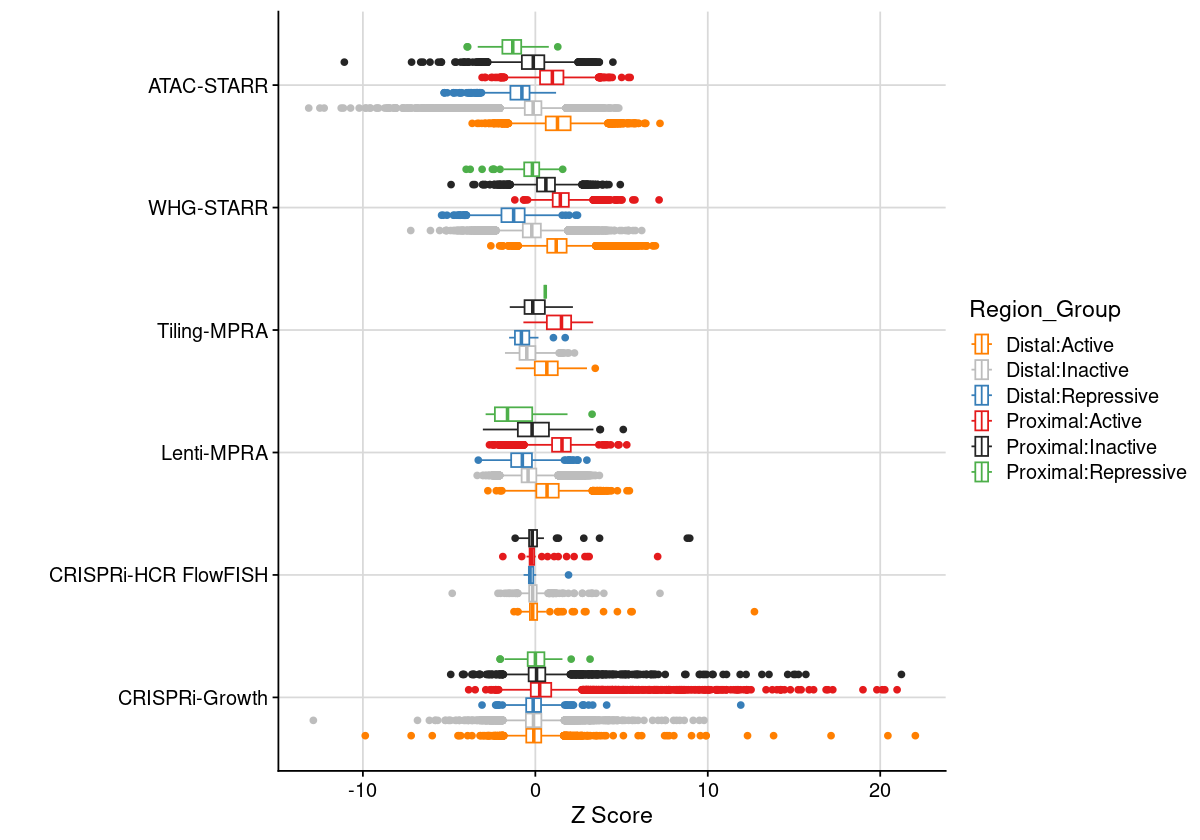

In [29]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA", 
    "CRISPRi-HCR FlowFISH", 
    "CRISPRi-Growth"
)
dat = dat %>% 
    dplyr::mutate(Region_Group = Group) %>%
    dplyr::mutate(Assay_Label  = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Region_Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

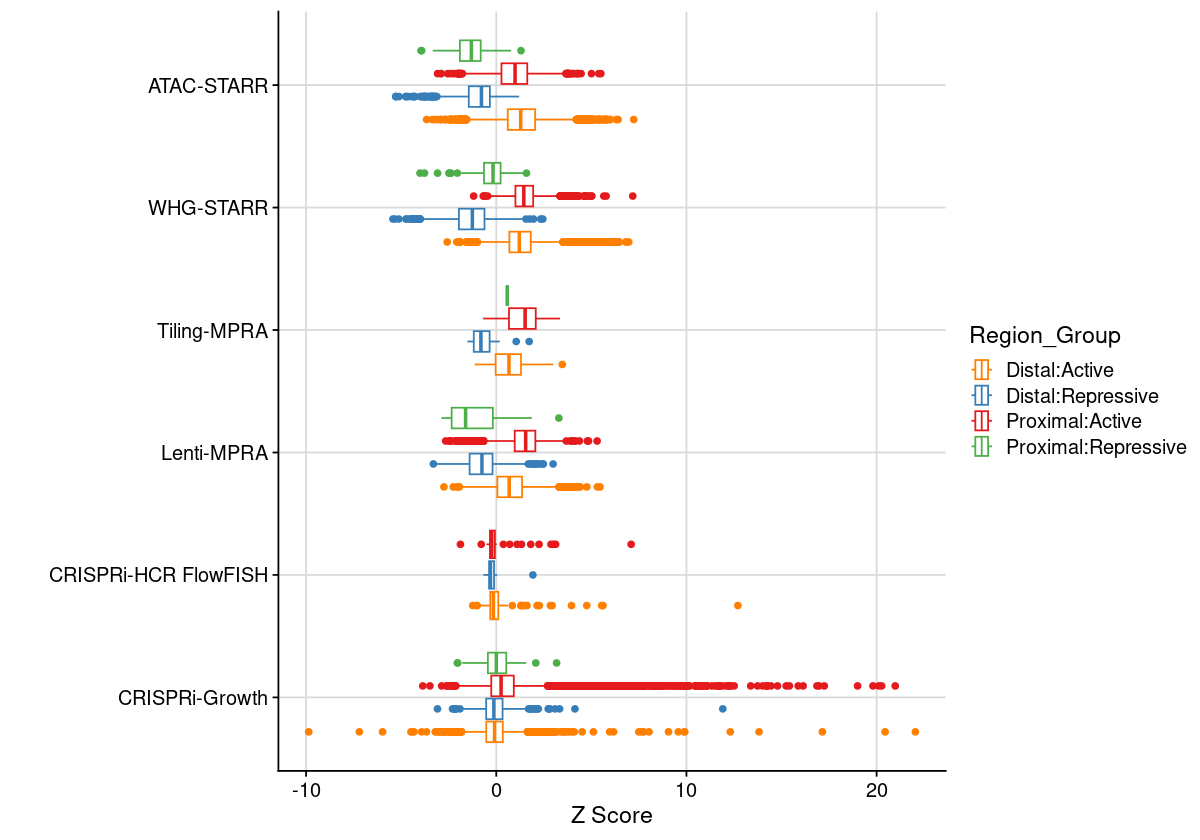

In [30]:
dat = dat_region_merge
vec = c(
    "ATAC-STARR", "WHG-STARR", 
    "Tiling-MPRA", "Lenti-MPRA", 
    "CRISPRi-HCR FlowFISH", 
    "CRISPRi-Growth"
)
dat = dat %>% 
    dplyr::mutate(Region_Group = Group) %>%
    dplyr::filter(!(str_detect(string = Region_Group, pattern = "Inactive"))) %>%
    dplyr::mutate(Assay_Label  = factor(Assay_Label, levels = rev(vec)))

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Region_Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

### CRISPRi-HCRFF

In [39]:
dat = dat_region_annot_chcrff
dat = dat %>% dplyr::filter(`CRISPRi-HCRFF` == 1)
vec = dat$Region

vec_txt_region = vec

In [40]:
vec_txt_assay = c("CRISPRi-HCR FlowFISH")

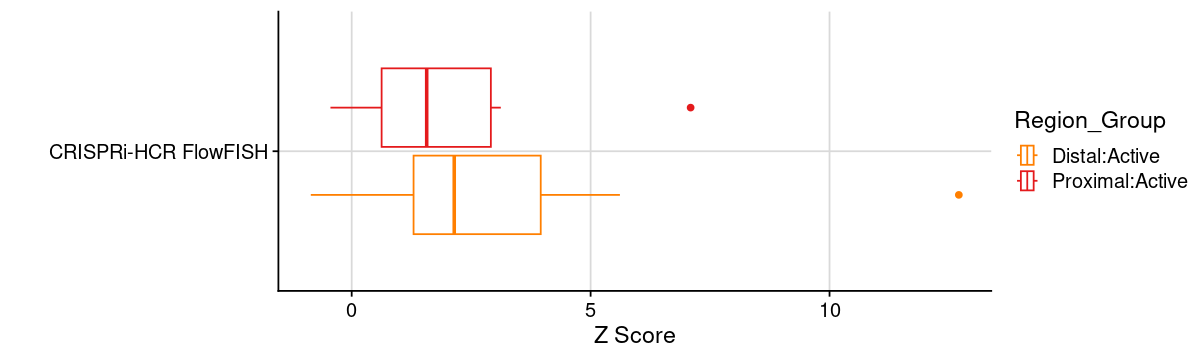

In [47]:
dat = dat_region_merge

dat = dat %>% 
    dplyr::mutate(Region_Group = Group) %>%
    dplyr::filter(!(str_detect(string = Region_Group, pattern = "Inactive"))) %>%
    dplyr::filter(!(str_detect(string = Region_Group, pattern = "Repressive"))) %>%
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Region %in% vec_txt_region)

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Region_Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

## CRISPRi-Growth

In [48]:
dat = dat_region_annot_cgrowth
dat = dat %>% dplyr::filter(`CRISPRi-Growth` == 1)
vec = dat$Region

vec_txt_region = vec

In [49]:
vec_txt_assay = c("CRISPRi-Growth")

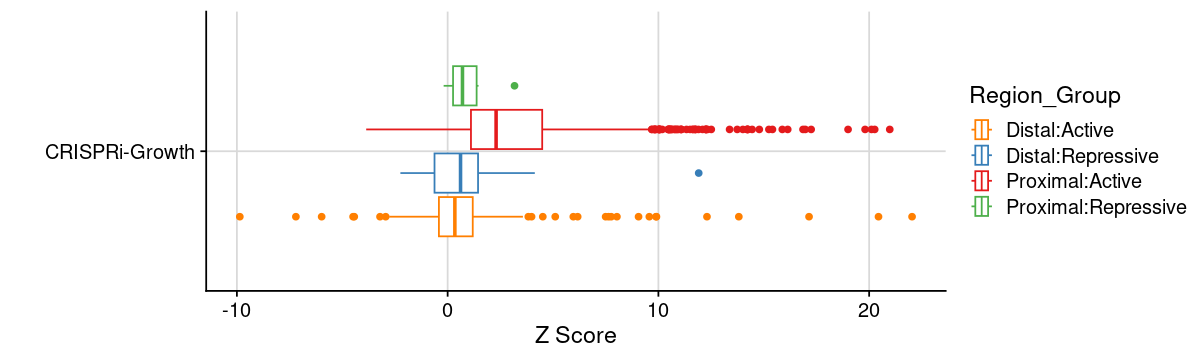

In [50]:
dat = dat_region_merge

dat = dat %>% 
    dplyr::mutate(Region_Group = Group) %>%
    dplyr::filter(!(str_detect(string = Region_Group, pattern = "Inactive"))) %>%
    #dplyr::filter(!(str_detect(string = Region_Group, pattern = "Repressive"))) %>%
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Region %in% vec_txt_region)

gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Region_Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "") +
    theme_cowplot() +
    background_grid() +
    theme_color

options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

**Essential vs Non-Essential***